# Exercise 1

## Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

In [2]:
csv_file_name = "advertising.csv" 

In [3]:
def get_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1)
    N = data.shape[0]
    
    X = data[:, :3]
    y = data[:, 3:]
    
    return data, X, y

def mean_normalization(X):
    N = len(X)
    
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    
    return X_b, maxi, mini, avg 
    

In [4]:
data, X, y = get_data(csv_file_name)

In [5]:
X_b, maxi, mini, avg = mean_normalization(X)

## Debugging

In [6]:
thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])
print(thetas)

[[ 1.16270837]
 [-0.81960489]
 [ 1.39501033]
 [ 0.29763545]]


In [7]:
xi = X_b[3:4]
print(xi)

[[ 1.          0.2852446  -0.08655027 -0.02852058]]


In [8]:
yi_hat = np.dot(xi, thetas)
print(yi_hat)

[[0.79969324]]


## Linear Regression

In [9]:
def predict(xi, thetas):
    return np.dot(xi, thetas)

def compute_loss(yi_hat, yi):
    loss = (yi_hat - yi) ** 2
    return loss 

def compute_gd_thetas(xi, yi_hat, yi):
    return 2 * xi.T * (yi_hat - yi)

def update_thetas(thetas, thetas_gd, lr):
    new_thetas = thetas - lr * thetas_gd
    return new_thetas
    

### 1) Stochastic_Gradient_Descent

In [10]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    N = len(y)
    
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Predict
            yi_hat = predict(xi, thetas)
            # Loss
            loss = compute_loss(yi_hat, yi)
            # Gradient Descent for loss
            # loss_gd = compute_gd_loss(loss)
            
            # Gradient Descent for thetas 
            thetas_gd = compute_gd_thetas(xi, yi_hat, yi)
            # Update theta
            thetas = update_thetas(thetas, thetas_gd, learning_rate)
            # Logging
            thetas_path.append(thetas)
            losses.append(loss[0])
            
    return thetas_path, losses

In [11]:
sgd_thetas, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

In [12]:
def visualize_sgd(losses):
    x_axis = list(range(500))
    plt.plot(x_axis, losses[:500], color='r')
    plt.title("Losses using SGD Linear Regression")
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

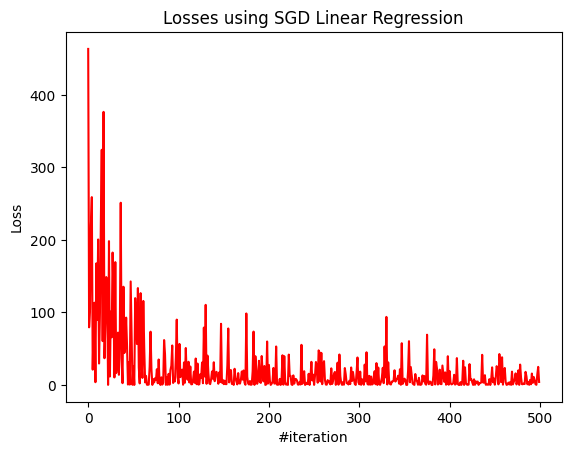

In [13]:
visualize_sgd(losses)

In [14]:
sgd_thetas, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

8392.629213090673


Q1: c 8754.64

### 2) Mini_Batch_Gradient_Descent